## K means Clustering Algorithm Implementation

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn.datasets import make_blobs

In [4]:
X,y=make_blobs(n_samples=1000,n_features=2,centers=3)

In [5]:
X

array([[ 0.86688712, -1.9415075 ],
       [ 5.62496076,  3.00399475],
       [-7.86922174,  8.19697938],
       ...,
       [-1.24782402, -0.14829099],
       [-0.23086294, -2.25723121],
       [ 0.13029435, -1.2414407 ]])

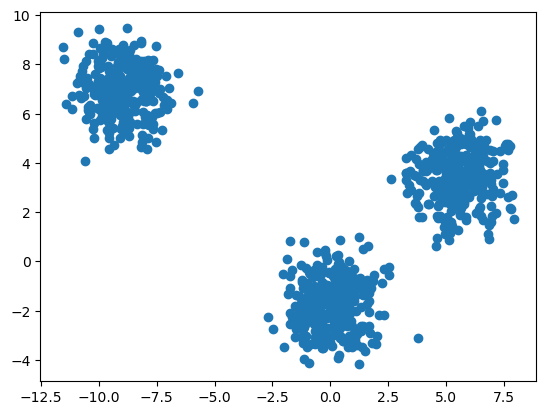

In [7]:
plt.scatter(X[:,0],X[:,1])

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=16)

In [10]:
from sklearn.cluster import KMeans

In [11]:
## Elbow method to select the k value

In [12]:
wcss= []
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [13]:
wcss

[33735.30888955057,
 7629.501603269725,
 1309.7423537131106,
 1136.41864238633,
 976.1932003849408,
 838.9090016674986,
 748.8824143520104,
 659.8993566086167,
 577.7809067800571,
 531.5397914976047]

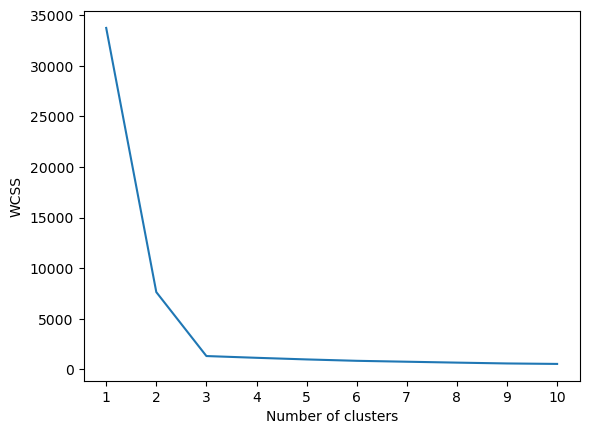

In [14]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [15]:
kmeans=KMeans(n_clusters=3,init='k-means++')

In [16]:
y_labels=kmeans.fit_predict(X_train)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


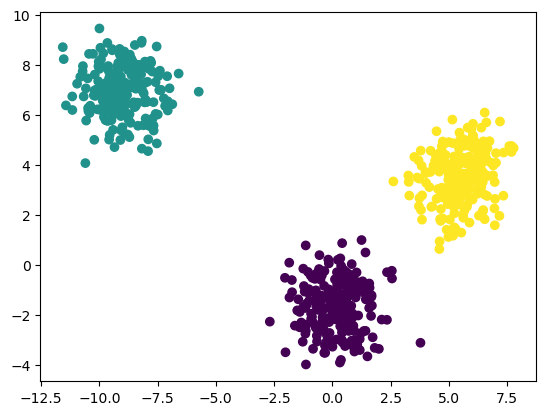

In [19]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

In [20]:
## knee locator
!pip install kneed

In [21]:
from kneed import KneeLocator
k1=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')

In [23]:
k1.elbow

3

In [24]:
## Silhoutte Score

In [25]:
from sklearn.metrics import silhouette_score

In [27]:
silhotte_Coef=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhotte_Coef.append(score)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [28]:
silhotte_Coef

[0.7275403667875088,
 0.7948663579139191,
 0.640659696531463,
 0.5091717633997142,
 0.32968099006737955,
 0.33489498462014533,
 0.3408754328332635,
 0.33653909175274616,
 0.3416487049422877]

In [29]:
silhotte_Coef=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_test)
    score=silhouette_score(X_test,kmeans.labels_)
    silhotte_Coef.append(score)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [30]:
silhotte_Coef

[0.7314391648987041,
 0.7979216734637143,
 0.6828975823020497,
 0.5376247287486164,
 0.35418410428031305,
 0.36713148475778734,
 0.36159890377121934,
 0.33212172086328795,
 0.33828894040969887]